In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=3, suppress=True)

import warnings
warnings.simplefilter("ignore")

from IPython.display import Image

In [7]:
# import data
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
df_raw = pd.read_csv(f'{PROJ_ROOT}/data/raw/cannabis.csv')
df_raw.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2351 non-null   object 
 4   Flavor       2305 non-null   object 
 5   Description  2318 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB


In [11]:
df_raw.isnull().sum()

Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64

In [14]:
df_raw['Strain'].nunique()

2350

In [17]:
df_raw['Type'].nunique()

3

hybrid    1212
indica     699
sativa     440
Name: Type, dtype: int64


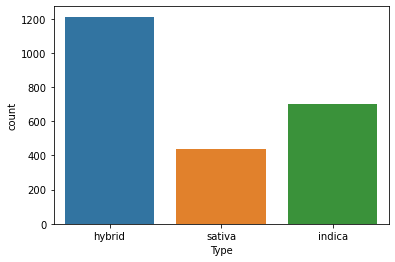

In [19]:
print(df_raw.Type.value_counts())
sns.categorical.countplot(df_raw.Type);

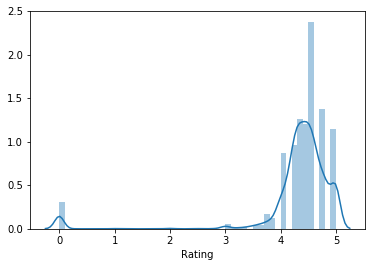

In [9]:
sns.distplot(df_raw.Rating);

In [21]:
df_raw.groupby(["Type"])["Rating"].max()

Type
hybrid    5.0
indica    5.0
sativa    5.0
Name: Rating, dtype: float64

In [22]:
df_raw.groupby(["Type"])["Rating"].min()

Type
hybrid    0.0
indica    0.0
sativa    0.0
Name: Rating, dtype: float64

In [23]:
df_raw.groupby(["Type"])["Rating"].mean()

Type
hybrid    4.291667
indica    4.347783
sativa    4.303864
Name: Rating, dtype: float64

In [24]:
effects = pd.DataFrame(df_raw.Effects.str.split(',', 4).tolist(),
             columns = ['Effect_one','Effect_two','Effect_three','Effect_four','Effect_five'])

flavors = pd.DataFrame(df_raw.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_one','Flavor_two','Flavor_three'])

In [25]:
effects

,Effect_one,Effect_two,Effect_three,Effect_four,Effect_five
0,Creative,Energetic,Tingly,Euphoric,Relaxed
1,Relaxed,Aroused,Creative,Happy,Energetic
2,Uplifted,Happy,Relaxed,Energetic,Creative
3,Tingly,Creative,Hungry,Relaxed,Uplifted
4,Happy,Relaxed,Euphoric,Uplifted,Talkative
...,...,...,...,...,...
2346,Happy,Uplifted,Relaxed,Euphoric,Energetic
2347,Relaxed,Happy,Euphoric,Uplifted,Sleepy
2348,Relaxed,Sleepy,Talkative,Euphoric,Happy
2349,Relaxed,Sleepy,Euphoric,Happy,Hungry


In [26]:
flavors

,Flavor_one,Flavor_two,Flavor_three
0,Earthy,Sweet,Citrus
1,Flowery,Violet,Diesel
2,Spicy/Herbal,Sage,Woody
3,Apricot,Citrus,Grapefruit
4,Citrus,Earthy,Orange
...,...,...,...
2346,Earthy,Woody,Pine
2347,Sweet,Berry,Grape
2348,Earthy,Sweet,Spicy/Herbal
2349,Sweet,Earthy,Pungent


In [27]:
# new dataframe with seperated effects + flavor
df_EF = pd.concat([df_raw, flavors], axis=1)

In [28]:
df_EF = pd.concat([df_EF, effects], axis=1)

In [30]:
df_EF

,Strain,Type,Rating,Effects,Flavor,Description,Flavor_one,Flavor_two,Flavor_three,Effect_one,Effect_two,Effect_three,Effect_four,Effect_five
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Earthy,Sweet,Citrus,Creative,Energetic,Tingly,Euphoric,Relaxed
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,Flowery,Violet,Diesel,Relaxed,Aroused,Creative,Happy,Energetic
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Spicy/Herbal,Sage,Woody,Uplifted,Happy,Relaxed,Energetic,Creative
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Apricot,Citrus,Grapefruit,Tingly,Creative,Hungry,Relaxed,Uplifted
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Citrus,Earthy,Orange,Happy,Relaxed,Euphoric,Uplifted,Talkative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",Zeus OG is a hybrid cross between Pineapple OG...,Earthy,Woody,Pine,Happy,Uplifted,Relaxed,Euphoric,Energetic
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",Zkittlez is an indica-dominant mix of Grape Ap...,Sweet,Berry,Grape,Relaxed,Happy,Euphoric,Uplifted,Sleepy
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",Zombie Kush by Ripper Seeds comes from two dif...,Earthy,Sweet,Spicy/Herbal,Relaxed,Sleepy,Talkative,Euphoric,Happy
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",If you’re looking to transform into a flesh-ea...,Sweet,Earthy,Pungent,Relaxed,Sleepy,Euphoric,Happy,Hungry


In [31]:
df_EF.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description',
       'Flavor_one', 'Flavor_two', 'Flavor_three', 'Effect_one', 'Effect_two',
       'Effect_three', 'Effect_four', 'Effect_five'],
      dtype='object')

Relaxed     825
Happy       476
Euphoric    249
Uplifted    244
Sleepy       89
Name: Effect_one, dtype: int64


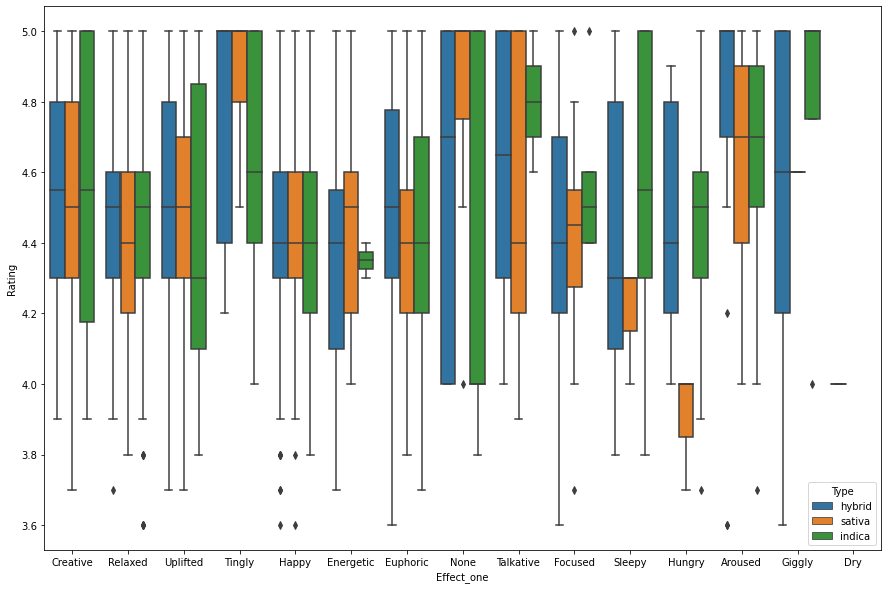

In [32]:
print(df_EF.Effect_one.value_counts().head())
plt.figure(figsize=(15,10))
sns.boxplot(x = "Effect_one", y = "Rating", hue="Type",data = df_EF[df_EF.Rating > 3.5]);

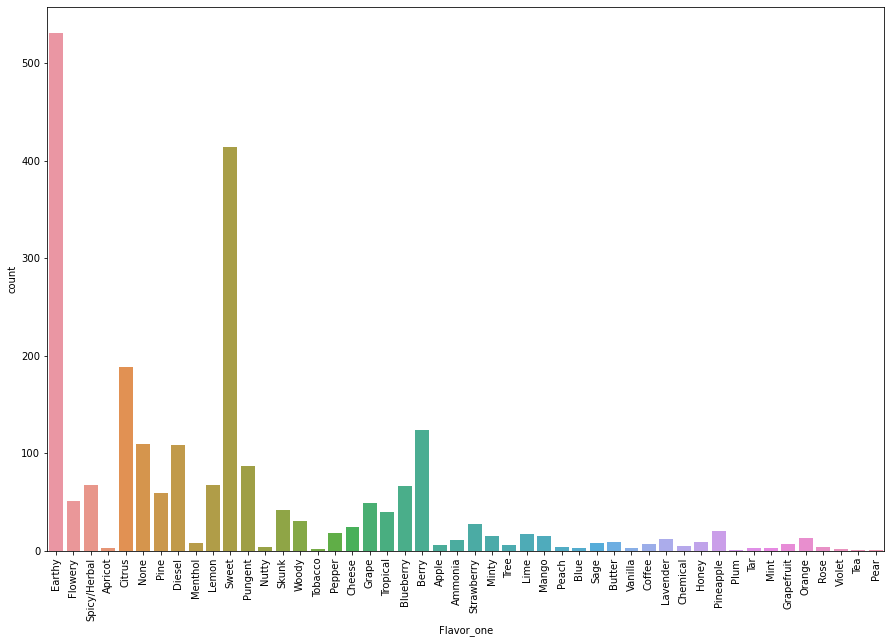

In [33]:
df_EF.Effect_one.value_counts().head()
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x = "Flavor_one",data = df_EF);